In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\Hello\OneDrive\Documents\CarPrice_Assignment (1)-checkpoint.csv")
print(df.head())
print(df.info())
print(df.describe())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts, 'Percentage': null_percentage})
print(null_summary)


                  Null Count  Percentage
car_ID                     0         0.0
symboling                  0         0.0
CarName                    0         0.0
fueltype                   0         0.0
aspiration                 0         0.0
doornumber                 0         0.0
carbody                    0         0.0
drivewheel                 0         0.0
enginelocation             0         0.0
wheelbase                  0         0.0
carlength                  0         0.0
carwidth                   0         0.0
carheight                  0         0.0
curbweight                 0         0.0
enginetype                 0         0.0
cylindernumber             0         0.0
enginesize                 0         0.0
fuelsystem                 0         0.0
boreratio                  0         0.0
stroke                     0         0.0
compressionratio           0         0.0
horsepower                 0         0.0
peakrpm                    0         0.0
citympg         

In [4]:
high_null_cols = null_summary[null_summary['Percentage'] > 40].index
df.drop(columns=high_null_cols, inplace=True)


In [5]:
df = df[df.isnull().sum(axis=1) <= 3]

In [6]:
df.drop(columns=['car_ID'], inplace=True)


In [9]:
df['carCompany'] = df['carCompany'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'volks': 'volkswagen', 
    'toyouta': 'toyota',
    'porcshce': 'porsche',
    'maxda': 'mazda',
    'nissan': 'nissan',  
    'chevy': 'chevrolet',
    'merc': 'mercedes'
})


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.columns = df.columns.str.replace('-', '_').str.replace(' ', '_')


In [11]:
df['car_stability'] = df['wheelbase'] / df['carlength']


In [12]:
corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.75]

df.drop(columns=['carlength', 'carwidth', 'curbweight', 'highwaympg', 'car_stability'], inplace=True)


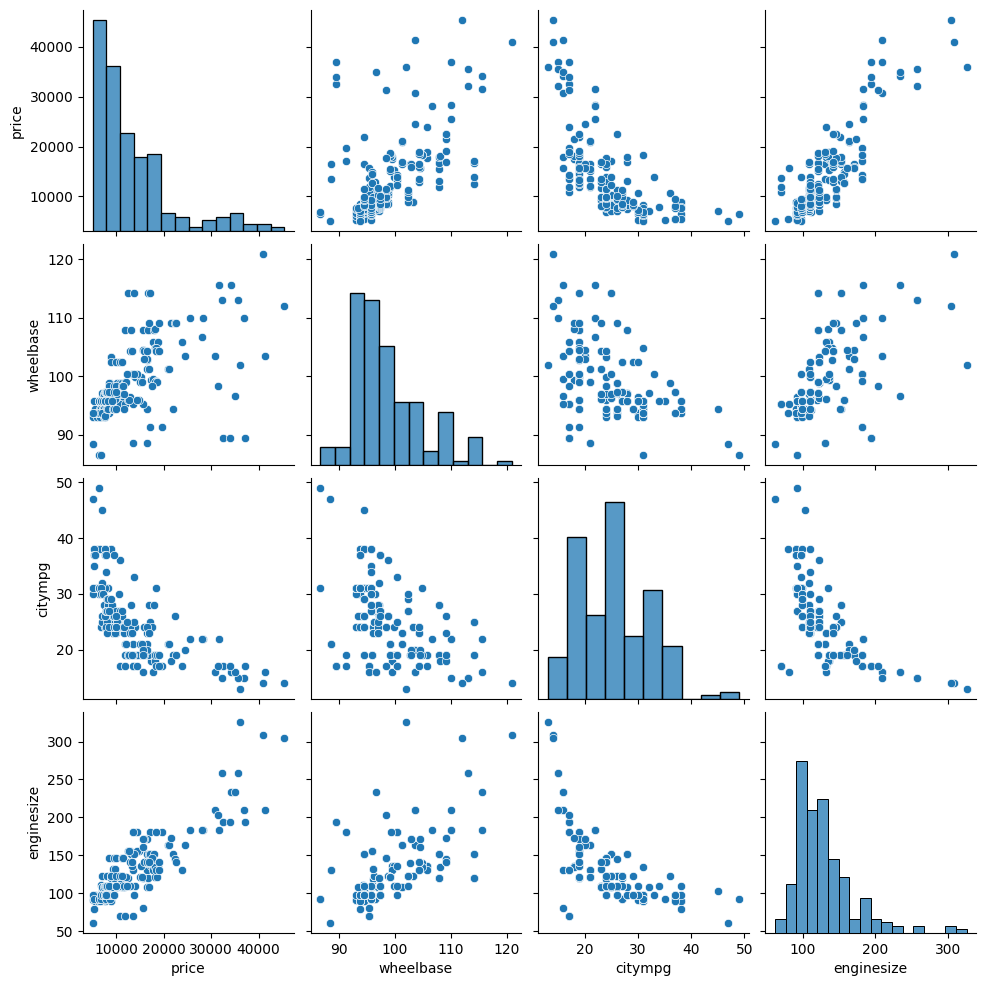

In [13]:
sns.pairplot(df[['price', 'wheelbase', 'citympg', 'enginesize']])
plt.show()


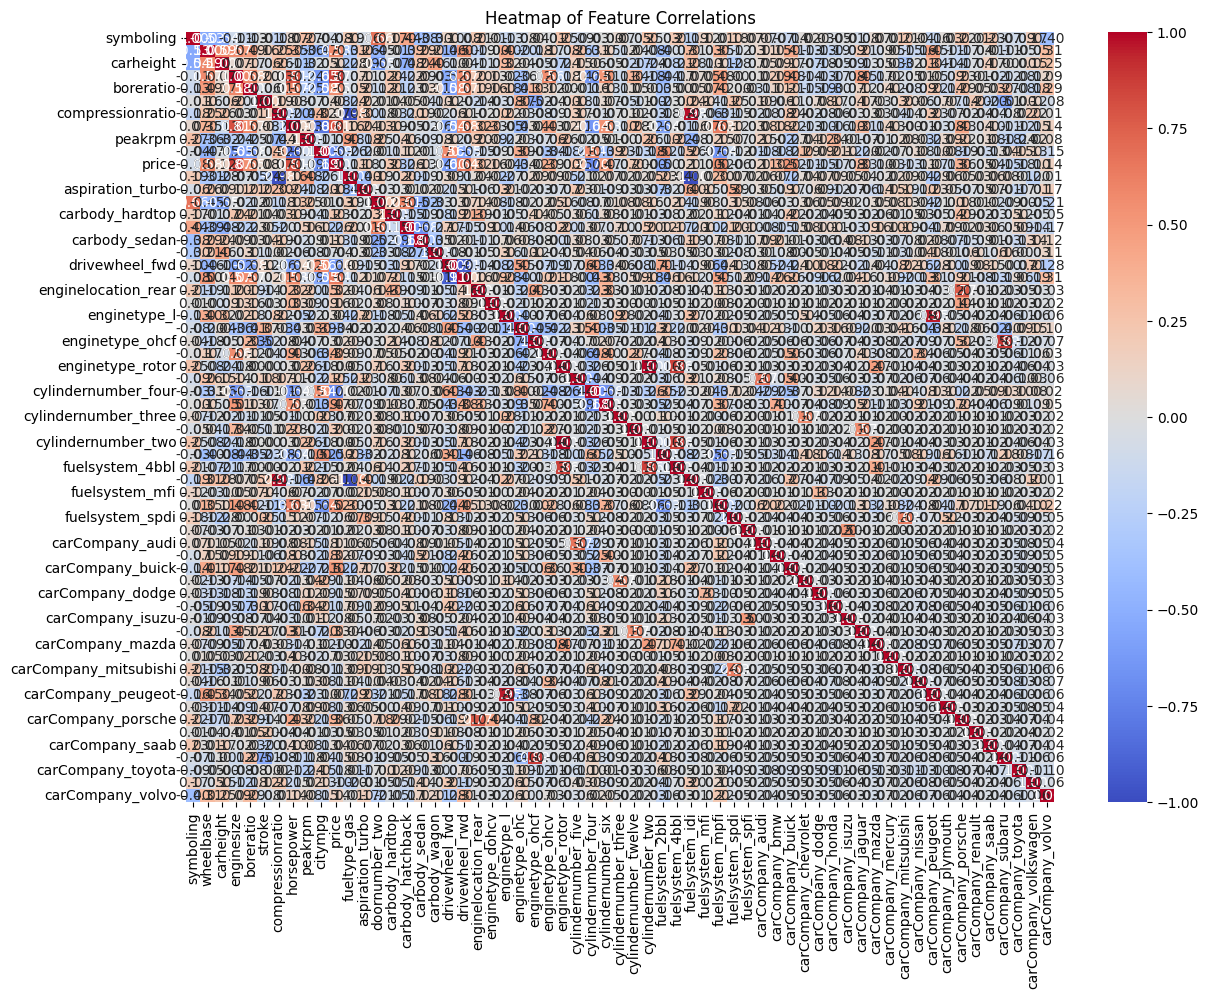

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()


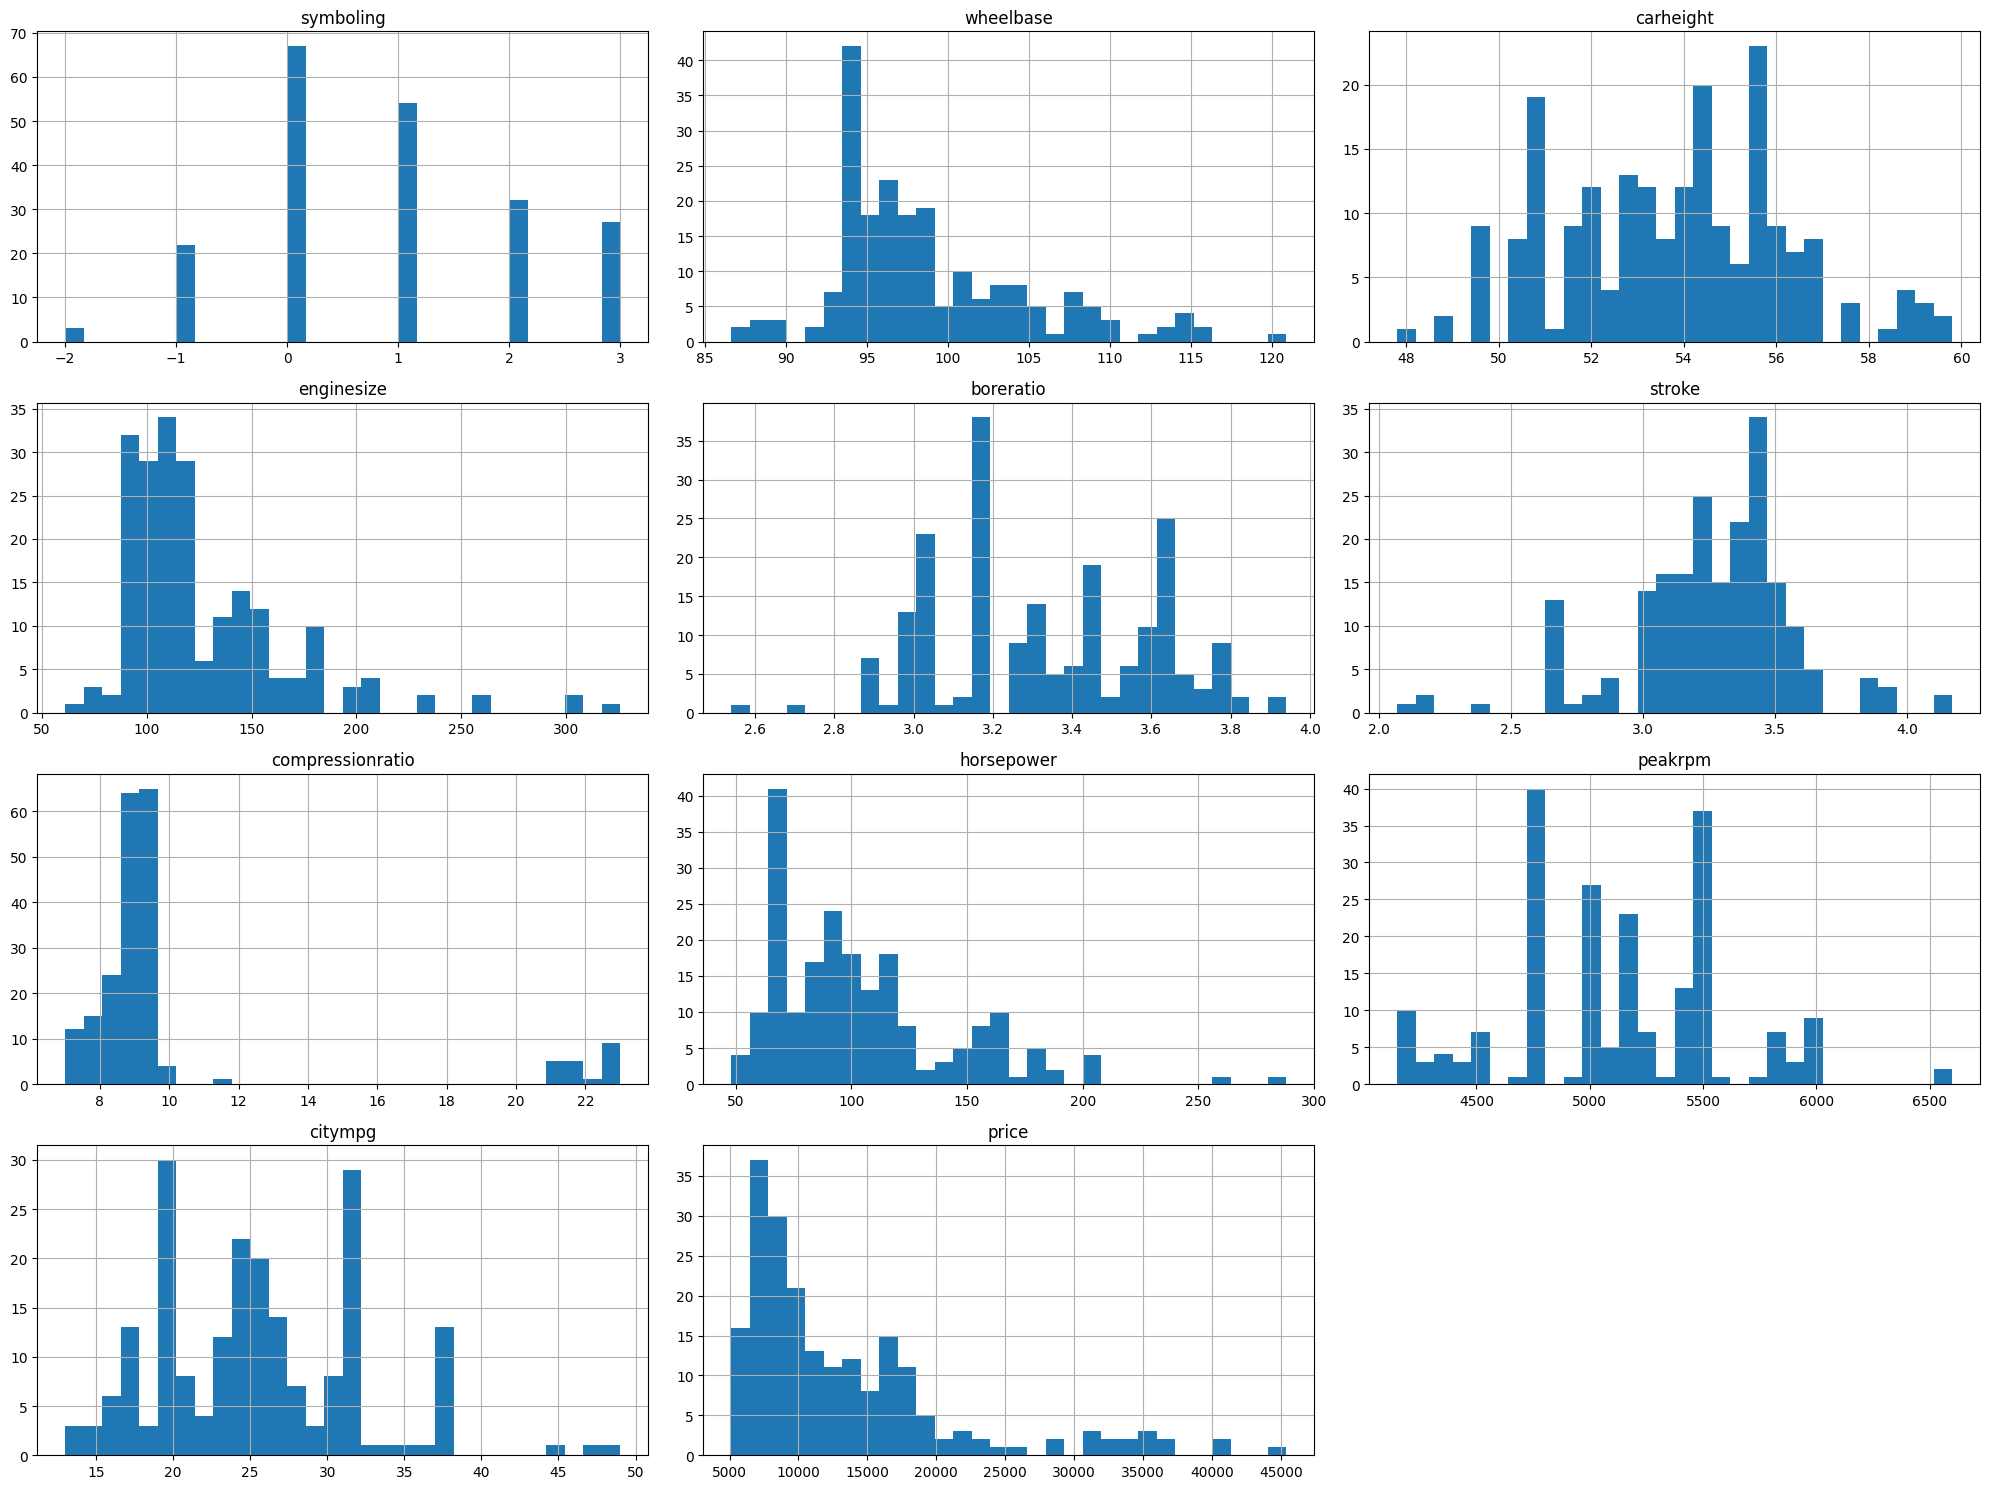

In [15]:
# Histogram
df.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

# Bar Chart for average price by company (if available)
if 'carCompany_volkswagen' in df.columns:
    pass  
